In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

/home/batson/miniconda3/envs/mcv7/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


Count data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81904
    
Annotations from https://singlecell.broadinstitute.org/single_cell/study/SCP3/retinal-bipolar-neuron-drop-seq

In [10]:
data = pd.read_csv('GSE81904_BipolarUMICounts_Cell2016.txt', sep='\t')

In [5]:
meta = pd.read_csv('clust_retinal_bipolar.txt', sep='\t')

In [11]:
meta = meta.loc[1:]

In [51]:
meta.index = meta['NAME']

In [22]:
counts_per_barcode = data.values.sum(0)

In [23]:
counts_per_gene = data.values.sum(1)

In [25]:
import matplotlib.pyplot as plt

(array([5.076e+03, 3.496e+03, 2.993e+03, 2.756e+03, 4.099e+03, 4.448e+03,
        1.754e+03, 2.580e+02, 2.100e+01, 3.000e+00]),
 array([0.        , 0.62132826, 1.24265652, 1.86398478, 2.48531305,
        3.10664131, 3.72796957, 4.34929783, 4.97062609, 5.59195435,
        6.21328262]),
 <a list of 10 Patch objects>)

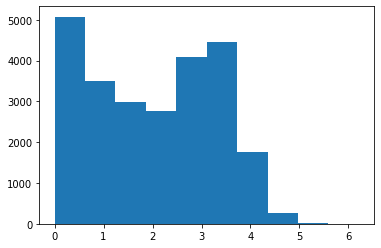

In [30]:
plt.hist(np.log10(1 + counts_per_gene))

In [33]:
cells_in_metadata = meta['NAME']

In [41]:
cells_to_keep = data.columns.isin(cells_in_metadata)

In [45]:
data_filtered = data.loc[:,cells_to_keep]

In [58]:
adata = sc.AnnData(X = data_filtered.T, obs = meta)

In [59]:
sc.pp.filter_genes(adata, min_cells=31)
sc.pp.filter_genes(adata, min_counts=61)

In [62]:
adata.X = adata.X.astype(np.int)

In [67]:
adata.write_h5ad('bipolar.h5ad')

... storing 'CLUSTER' as categorical
... storing 'SUB-CLUSTER' as categorical


In [68]:
from scipy.sparse import csr_matrix

In [69]:
adata_sparse = adata.copy()
adata_sparse.X = csr_matrix(adata.X)
adata_sparse.write_h5ad('bipolar_sparse.h5ad')

# Remap clusters to cell types

In [2]:
adata = sc.read('/mnt/ibm_lg/james/mcv_workspace/data/bipolar/bipolar.h5ad')

In [3]:
bipolar_renaming = {'BC1A': 'BC1',
                    'BC1B': 'BC1',
                    'BC3A': 'BC3',
                    'BC3B': 'BC3',
                    'BC5A (Cone Bipolar cell 5A)': 'BC5',
                    'BC5B': 'BC5',
                    'BC5C': 'BC5',
                    'BC5D': 'BC5'
                    }

In [4]:
adata.obs['annotation'] = adata.obs['CLUSTER'].apply(lambda x: bipolar_renaming[x] if x in bipolar_renaming else x)

In [5]:
adata.write_h5ad('/mnt/ibm_lg/james/mcv_workspace/data/bipolar/bipolar_anno.h5ad')

... storing 'annotation' as categorical
